In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
coin_id= list(df_market_data.index)

In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:


# Identify columns to scale, excluding non-numeric ones (e.g., 'coin_id')
columns_to_scale = df_market_data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric data
scaled_data = scaler.fit_transform(df_market_data[columns_to_scale])

# Convert the scaled data back to a DataFrame if desired
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=df_market_data.index)

# Display the scaled DataFrame
print(scaled_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [8]:
# Create a DataFrame with the scaled data
scaled_crypto_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Copy the crypto names from the original DataFrame
coin_id= list(df_market_data.index)
scaled_crypto_df['coin_id'] = coin_id

# Set the coin_id column as index
scaled_crypto_df = scaled_crypto_df.set_index('coin_id')

# Display the scaled DataFrame
scaled_crypto_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [10]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
     kmeans = KMeans(n_clusters=k, random_state=0)
     kmeans.fit(scaled_crypto_df)
     inertia.append(kmeans.inertia_)
     print(inertia)

c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0]
[287.0, 198.57181809798124]


c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 198.57181809798124, 145.63574772192865]
[287.0, 198.57181809798124, 145.63574772192865, 79.02243535120975]


c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 198.57181809798124, 145.63574772192865, 79.02243535120975, 66.21778006000338]
[287.0, 198.57181809798124, 145.63574772192865, 79.02243535120975, 66.21778006000338, 59.13907002537008]


c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 198.57181809798124, 145.63574772192865, 79.02243535120975, 66.21778006000338, 59.13907002537008, 48.406314490413614]
[287.0, 198.57181809798124, 145.63574772192865, 79.02243535120975, 66.21778006000338, 59.13907002537008, 48.406314490413614, 38.993587989279696]


c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 198.57181809798124, 145.63574772192865, 79.02243535120975, 66.21778006000338, 59.13907002537008, 48.406314490413614, 38.993587989279696, 34.40059545400234]
[287.0, 198.57181809798124, 145.63574772192865, 79.02243535120975, 66.21778006000338, 59.13907002537008, 48.406314490413614, 38.993587989279696, 34.40059545400234, 28.573602560967856]
[287.0, 198.57181809798124, 145.63574772192865, 79.02243535120975, 66.21778006000338, 59.13907002537008, 48.406314490413614, 38.993587989279696, 34.40059545400234, 28.573602560967856, 23.890044355377952]


c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame to check the Elbow curve data
print(elbow_df)

     k     inertia
0    1  287.000000
1    2  198.571818
2    3  145.635748
3    4   79.022435
4    5   66.217780
5    6   59.139070
6    7   48.406314
7    8   38.993588
8    9   34.400595
9   10   28.573603
10  11   23.890044


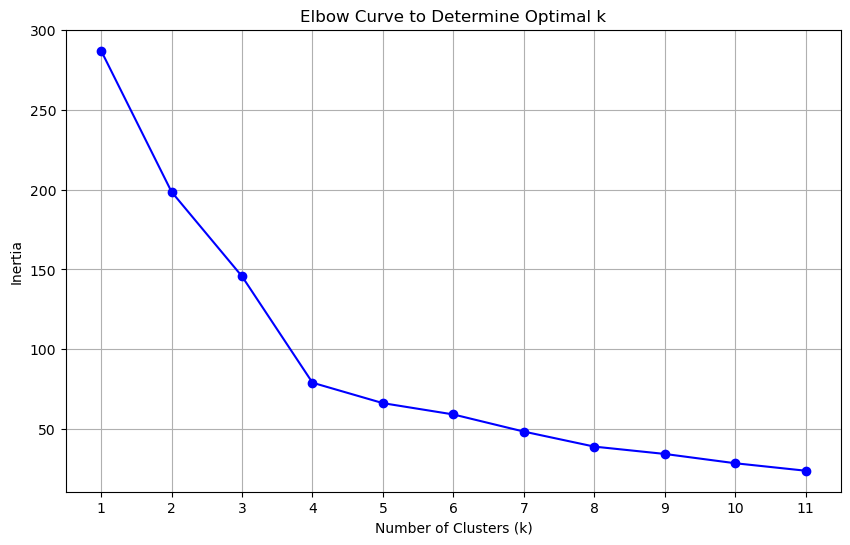

In [12]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Display all k values on the x-axis
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** From the graph above, 4 is the best k value. 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [13]:


# Set the best value for k based on the Elbow curve analysis
best_k = (4)  # replace with the identified optimal k, like 3 or 4

# Initialize the K-Means model with the best k
kmeans_model = KMeans(n_clusters=4, random_state=0)

# Fit the model to your scaled data
kmeans_model.fit(scaled_crypto_df)

# Display the labels to check clustering results if needed
print(kmeans_model.labels_)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
# Fit the K-Means model using the scaled DataFrame
# Fit the K-Means model to the scaled data
kmeans_model.fit(scaled_crypto_df)

# Optionally, check the resulting cluster labels
cluster_labels = kmeans_model.labels_

# Add the cluster labels to the scaled DataFrame for easy analysis
scaled_crypto_labels_df = scaled_crypto_df.copy()
scaled_crypto_labels_df['cluster'] = cluster_labels


# Display the DataFrame with cluster assignments
scaled_crypto_labels_df.head()


c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_predicts = kmeans_model.predict(scaled_crypto_df)

# Print the resulting array of cluster values.
print(cluster_predicts)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [16]:
# Create a copy of the scaled DataFrame
scaled_df_copy = scaled_df.copy()

In [17]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_df_copy['cluster'] = cluster_labels

# Display the copy of the scaled DataFrame
scaled_df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [18]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = scaled_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c='cluster',  # Color by cluster labels
    hover_cols=['coin_id'],  # Display crypto name on hover
    title="Cryptocurrency Clustering by 24h and 7d Price Change",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    width=700,
    height=500
)

# Display the plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:

# Create a PCA model instance with n_components set to 3
pca_model = PCA(n_components=3)

# Fit the PCA model on the scaled data if you plan to transform it right away
pca_data = pca_model.fit_transform(scaled_df_copy.drop(columns='cluster'))  # Exclude cluster column if it's already added

# Optionally, display the transformed data's shape to confirm
print(pca_data.shape)


(41, 3)


In [20]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca_model.fit_transform(scaled_crypto_df)

# View the scaled PCA data
pca_columns = ['PC1', 'PC2', 'PC3']
pca_df = pd.DataFrame(data=pca_data, columns=pca_columns, index=scaled_crypto_df.index)
# Apply the PCA transformation to reduce the scaled DataFrame to three principal components
pca_transformed_data = pca_model.fit_transform(scaled_df_copy.drop(columns='cluster'))  # Exclude 'cluster' if it's already present

# Convert the transformed data to a DataFrame for easier viewing
pca_df = pd.DataFrame(pca_transformed_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Display the first few rows of the PCA-transformed data
pca_df.head()


,PCA1,PCA2,PCA3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [21]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

# Retrieve the explained variance ratio from the PCA model
explained_variance = pca_model.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

# Display the explained variance for each principal component
explained_variance

print(f"Explained variance for each component: {explained_variance}")
print(f"Total explained variance: {total_explained_variance}")

Explained variance for each component: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The Total explained varience is 0.895 or 89.5%

In [22]:
# Create a DataFrame from the PCA-transformed data
pca_df = pd.DataFrame(pca_transformed_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names (coin_id) from the original scaled DataFrame and set it as the index
pca_df['coin_id'] = scaled_df_copy.index
pca_df.set_index('coin_id', inplace=True)

# Display the new DataFrame with PCA data
pca_df.head()


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [23]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
k_values


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [24]:


# Create an empty list to store the inertia values
inertia = []

# Loop through each k-value in the list to compute inertia
for k in k_values:
    # 1. Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using the PCA-transformed DataFrame (assuming df_market_data_pca is available)
    kmeans.fit(pca_df)  # df_market_data_pca assumed to be the PCA-transformed data
    
    # 3. Append the model's inertia to the inertia list
    inertia.append(kmeans.inertia_)

# Display the list of inertia values
inertia


c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

[256.8740855678926,
 168.8118963068523,
 115.91807663320068,
 49.66549665179739,
 41.35731380312858,
 30.796641787041615,
 25.915456910456154,
 21.890936274633237,
 17.720698854473675,
 13.83869870886458,
 7.98435481189623]

In [25]:
# Create a dictionary with the k-values and their corresponding inertia values
elbow_pca_data = {
    "k": k_values,
    "inertia": inertia
}

# Convert the dictionary into a DataFrame
elbow_pca_df = pd.DataFrame(elbow_pca_data)

# Display the DataFrame to check the Elbow curve data
elbow_pca_df.head()


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


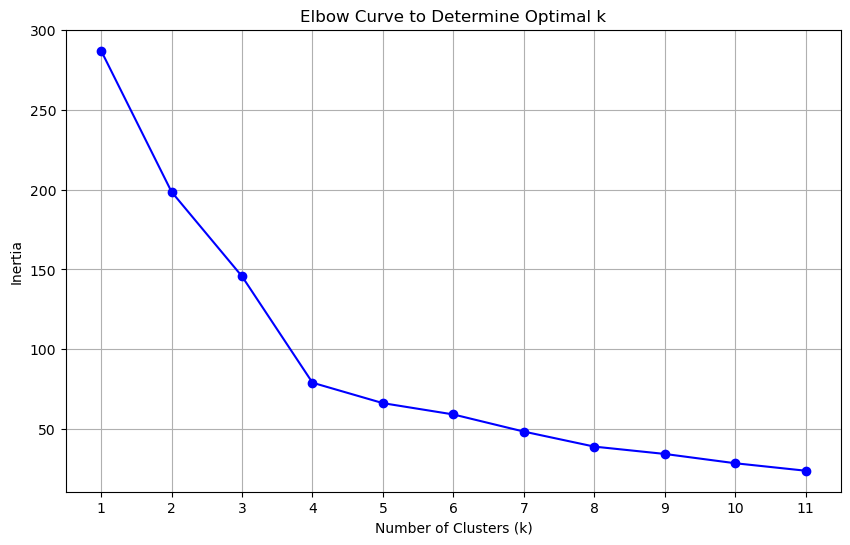

In [26]:


# Plot the Elbow curve to help identify the optimal k value
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Display all k values on the x-axis
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** from the above graph, 4 can be considered the best k value 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** I dont see it differ from the original data because both are at 4

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [27]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=0)

In [28]:
# Assuming the best value for k has been determined (e.g., k=3 based on the Elbow curve)
best_k = 4  # Replace with the optimal k value you identified

# Initialize the KMeans model with the optimal k
kmeans_model = KMeans(n_clusters=4, random_state=0)

# Model is ready to be fitted with the data
kmeans_model


KMeans(n_clusters=4, random_state=0)

In [29]:
# Fit the K-Means model to the PCA-transformed data
kmeans_model.fit(pca_df)

# Display the cluster labels to verify
cluster_labels = kmeans_model.labels_
cluster_labels


c:\Users\adolp\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [30]:
# Predict clusters for each data point in the PCA-transformed DataFrame
predicted_clusters = kmeans_model.predict(pca_df)

# Print the resulting array of cluster values
predicted_clusters


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [31]:
# Create a copy of the scaled PCA DataFrame
pca_df_copy = pca_df.copy()

# Add the predicted clusters as a new column
pca_df_copy['cluster'] = predicted_clusters

# Display the updated PCA DataFrame with the cluster labels
pca_df_copy.head()


,PCA1,PCA2,PCA3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [32]:


# Rename the PCA columns for easier identification in the plot
pca_df_copy.rename(columns={'PCA1': 'PC1', 'PCA2': 'PC2', 'PCA3': 'PC3'}, inplace=True)

# Create the scatter plot with hvPlot
scatter_plot = pca_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    c='cluster',  # Color by the K-Means cluster labels
    hover_cols=['coin_id'],  # Display crypto name on hover
    title="Cryptocurrency Clustering by PCA Components",
    xlabel="Principal Component 1",
    ylabel="Principal Component 2",
    width=700,
    height=500
)

# Display the plot
scatter_plot


:Scatter   [PC1]   (PC2,cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [33]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE
# elbow_df["inertia"]
elbow_pca_df["inertia"]


0     256.874086
1     168.811896
2     115.918077
3      49.665497
4      41.357314
5      30.796642
6      25.915457
7      21.890936
8      17.720699
9      13.838699
10      7.984355
Name: inertia, dtype: float64

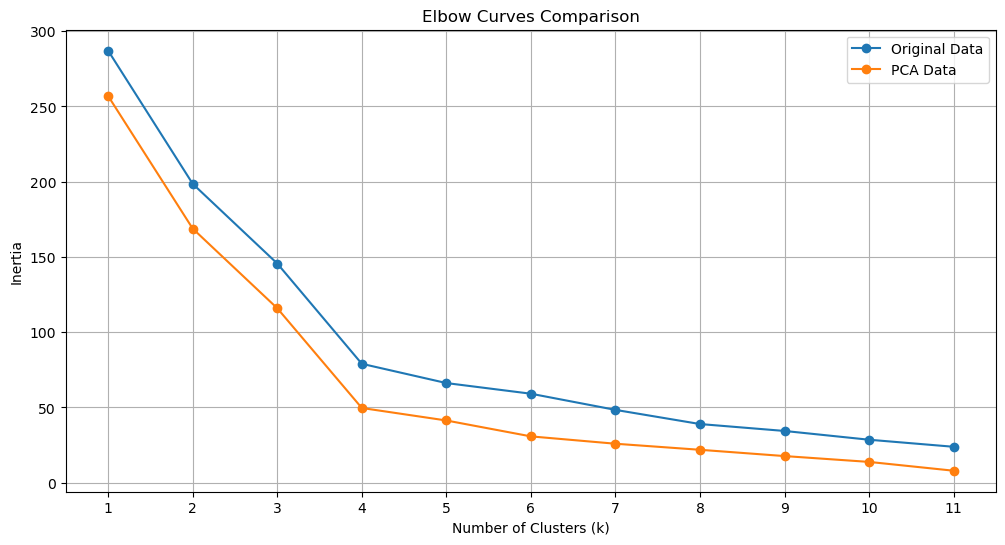

In [34]:


# Assuming you have different inertia values for different transformations or datasets
# Replace these lists with your actual inertia values for each method
inertia_original = elbow_df["inertia"]
inertia_pca = elbow_pca_df["inertia"]


# Define k values (assuming the same k-values for each)
k_values = list(range(1, 12))

# Plot Elbow curves
plt.figure(figsize=(12, 6))

# Original data Elbow curve
plt.plot(k_values, inertia_original, marker='o', linestyle='-', label='Original Data')

# PCA-transformed data Elbow curve
plt.plot(k_values, inertia_pca, marker='o', linestyle='-', label='PCA Data')



# Customize plot
plt.title('Elbow Curves Comparison')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.legend()
plt.grid(True)

# Display plot
plt.show()


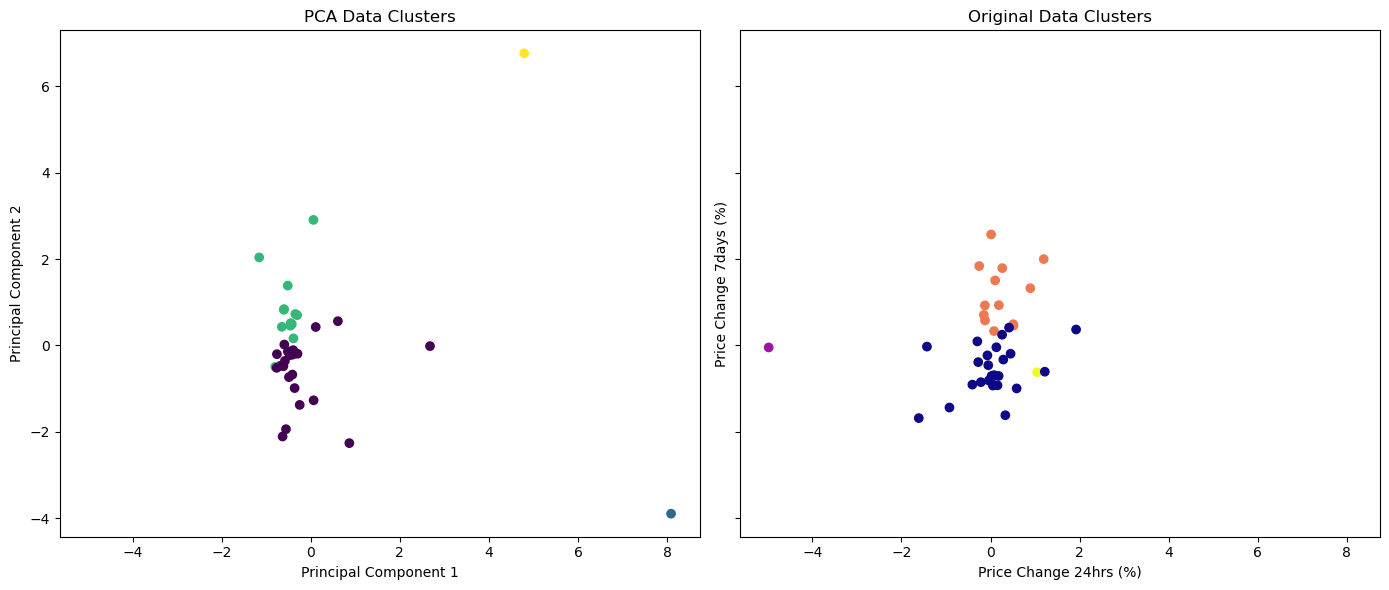

In [35]:
import matplotlib.pyplot as plt

# Assuming you have the data in different DataFrames with cluster labels:
# - pca_df_copy for PCA-transformed data with K-Means clustering
# - another_df for the original data with K-Means clustering
# Replace these DataFrames and column names with your actual data

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot clusters for PCA-transformed data
axes[0].scatter(pca_df_copy['PC1'], pca_df_copy['PC2'], c=pca_df_copy['cluster'], cmap='viridis')
axes[0].set_title('PCA Data Clusters')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Plot clusters for another data transformation or original data
axes[1].scatter(scaled_crypto_labels_df['price_change_percentage_24h'], scaled_crypto_labels_df['price_change_percentage_7d'], c=scaled_crypto_labels_df['cluster'], cmap='plasma')
axes[1].set_title('Original Data Clusters')
axes[1].set_xlabel('Price Change 24hrs (%)')
axes[1].set_ylabel('Price Change 7days (%)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features with K-Means clustering can lead to simpler, more interpretable clusters that are faster to compute but might lose some finer details of the data. The impact is largely positive for efficiency and interpretability but may require a careful balance to avoid oversimplifying complex data structures.